In [ ]:
!pip install ultralytics pytesseract opencv-python

In [ ]:
import cv2
import pytesseract
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [ ]:
try:
    model = YOLO('/content/best.pt')
except Exception as e:
    print(f"Error loading model: {e}")
    exit()


image_path = '/content/img124.jpg'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    print("Image loaded successfully.")
except Exception as e:
    print(e)
    exit()

Image loaded successfully.


In [ ]:
results = model.predict(image, conf=0.6)

result = results[0]
detected_numbers = []

print(f"Found {len(result.boxes)} potential objects.")


0: 224x320 11 dimensionss, 448.9ms
Speed: 1.4ms preprocess, 448.9ms inference, 3.0ms postprocess per image at shape (1, 3, 224, 320)
Found 11 potential objects.



--- Detected Numbers ---
Box (293, 236, 329, 265): Number = 5
Box (198, 164, 228, 188): Number = 5
Box (53, 202, 86, 223): Number = 10
Box (381, 366, 415, 384): Number = 10
Box (447, 47, 492, 77): Number = 1
Box (539, 227, 573, 252): Number = 65
Box (143, 256, 170, 274): Number = 15
Box (484, 276, 521, 300): Number = 35
Box (253, 19, 286, 44): Number = 60
Box (21, 202, 52, 222): Number = 5


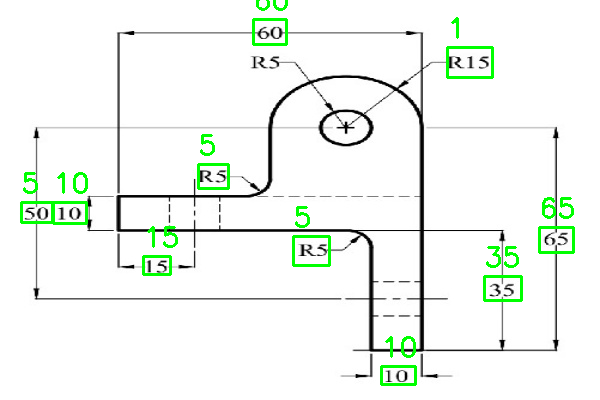


Saved result to output_with_numbers.jpg


In [ ]:
for box in result.boxes:

    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    x1, y1, x2, y2 = cords


    cropped_image = image[y1:y2, x1:x2]


    gray_crop = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)


    config = "--psm 7 -c tessedit_char_whitelist=0123456789"

    try:
        number_text = pytesseract.image_to_string(gray_crop, config=config)

        number_text = number_text.strip()

        if number_text:
            detected_numbers.append({
                "box": (x1, y1, x2, y2),
                "number": number_text
            })

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, number_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    except Exception as e:
        print(f"Error during OCR: {e}")



print("\n--- Detected Numbers ---")
for item in detected_numbers:
    print(f"Box {item['box']}: Number = {item['number']}")


cv2_imshow(image)



cv2.imwrite("output_with_numbers.jpg", image)
print("\nSaved result to output_with_numbers.jpg")